# Ontario Covid-19 Data Analysis
Date Sept 7 2021

Prepared by ***Keqi Deng***

Data Source: [Ontario Open Data](https://data.ontario.ca/en/dataset)

## Note
This analysis used public data provided by Ontario Public Health. The main purpose of this analysis is to find the correlation between different attributes. Analysis methods are not from academical research. The author of this report does not have background in epidemiology. This study is solely for data analysis demonstration purpose only.

## Analysis Goals
* Calculate the R-rate

## Import Packages

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import io

## Import Data
In order to import the online csv datasets from public data, use the following instant function to simplify the process:

In [66]:
def df_csv(url):
    source = requests.get(url).text
    reader = io.StringIO(source)
    return pd.read_csv(reader)

Then, import [Status of COVID-19 cases in Ontario](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11) and [Daily change in cases by PHU](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f) datasets from Ontario Government website:

In [67]:
on_covid_status_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')
on_covid_status_df['Reported Date'] = pd.to_datetime(on_covid_status_df['Reported Date'])

print(on_covid_status_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 27 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Reported Date                                              580 non-null    datetime64[ns]
 1   Confirmed Negative                                         47 non-null     float64       
 2   Presumptive Negative                                       12 non-null     float64       
 3   Presumptive Positive                                       25 non-null     float64       
 4   Confirmed Positive                                         578 non-null    float64       
 5   Resolved                                                   568 non-null    float64       
 6   Deaths                                                     540 non-null    float64       
 7   Total Cases                        

In [68]:
phu_daily_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv')
phu_daily_df['Date'] = pd.to_datetime(phu_daily_df['Date'])

print(phu_daily_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            533 non-null    datetime64[ns]
 1   Algoma_District                 530 non-null    float64       
 2   Brant_County                    530 non-null    float64       
 3   Chatham_Kent                    530 non-null    float64       
 4   Durham_Region                   530 non-null    float64       
 5   Eastern_Ontario                 530 non-null    float64       
 6   Grey_Bruce                      530 non-null    float64       
 7   Haldimand_Norfolk               530 non-null    float64       
 8   Haliburton_Kawartha_Pine_Ridge  530 non-null    float64       
 9   Halton_Region                   530 non-null    float64       
 10  City_of_Hamilton                530 non-null    float64       
 11  Hastin

## Analysis
Calculate the rolling average of the different health regions:


In [69]:
phu_daily_avg_df = phu_daily_df.rolling(window = 7).mean()
phu_daily_avg_df.drop('Total', axis = 1, inplace = True)
phu_daily_avg_df['Date'] = phu_daily_df.Date
phu_daily_avg_df.dropna(how='any', inplace=True)
print(phu_daily_avg_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 12 to 532
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Algoma_District                 521 non-null    float64       
 1   Brant_County                    521 non-null    float64       
 2   Chatham_Kent                    521 non-null    float64       
 3   Durham_Region                   521 non-null    float64       
 4   Eastern_Ontario                 521 non-null    float64       
 5   Grey_Bruce                      521 non-null    float64       
 6   Haldimand_Norfolk               521 non-null    float64       
 7   Haliburton_Kawartha_Pine_Ridge  521 non-null    float64       
 8   Halton_Region                   521 non-null    float64       
 9   City_of_Hamilton                521 non-null    float64       
 10  Hastings_Prince_Edward          521 non-null    float64       
 11  Huron

Plot the result

<AxesSubplot:>

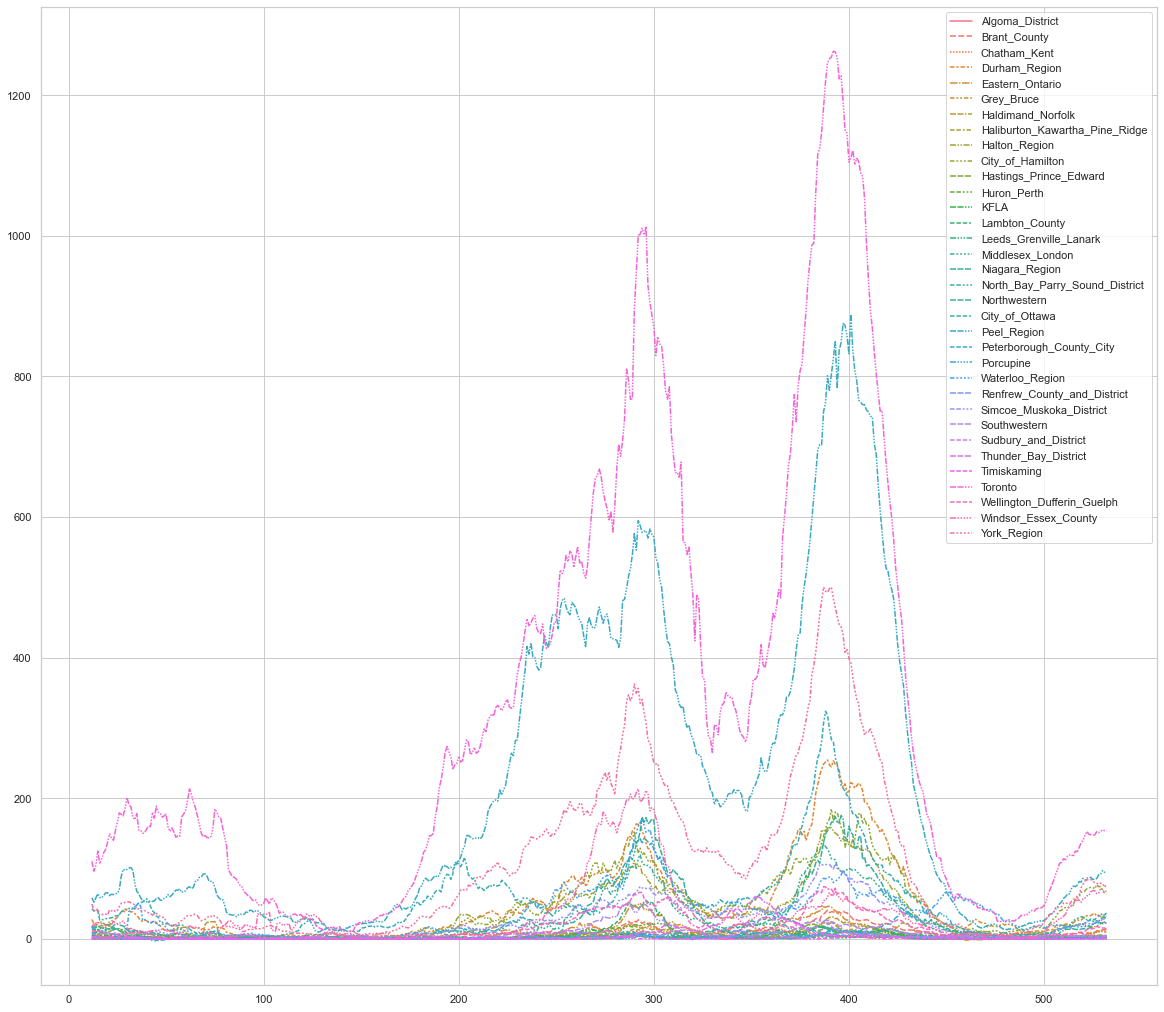

In [79]:
plt.figure(figsize=(20,18))
sns.set_theme(style="whitegrid", palette="colorblind")
sns.lineplot(data = phu_daily_avg_df)

We realize that it is hard to show the trend for specific regions.

In order to do that, we would like to focus on top 4 regions with top average daily cases:

In [84]:
phu_daily_df.mean().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_16817/1907219756.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  phu_daily_df.mean().sort_values(ascending=False)


Total                             1070.247655
Toronto                            321.475472
Peel_Region                        212.347170
York_Region                        103.901887
City_of_Ottawa                      53.901887
Durham_Region                       49.673585
City_of_Hamilton                    44.332075
Waterloo_Region                     35.986792
Windsor_Essex_County                35.224528
Halton_Region                       34.432075
Niagara_Region                      31.901887
Middlesex_London                    25.471698
Simcoe_Muskoka_District             24.730189
Wellington_Dufferin_Guelph          16.364151
Eastern_Ontario                      9.081132
Brant_County                         7.894340
Southwestern                         7.760377
Lambton_County                       6.973585
Thunder_Bay_District                 6.366038
Haldimand_Norfolk                    5.296226
Haliburton_Kawartha_Pine_Ridge       4.407547
Sudbury_and_District              

The regions with top 4 daily COVID-19 cases are Toronto, Peel, York and Ottawa.
